In [1]:
import warnings

warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
from datetime import date

import matplotlib
import matplotlib.pyplot as plt
from pylab import imshow
import sys, os, os.path, pickle, time

# sys.path.append("/Users/hn/Documents/00_GitHub/Ag/NASA/Python_codes/")
# import NASA_core as nc

In [2]:
data_dir_ = "/Users/hn/Documents/01_research_data/Amin/Joel/"
plot_dir = data_dir_ + "plots/"

os.makedirs(plot_dir, exist_ok=True)

In [3]:
data_2022_nofilter = pd.read_csv(data_dir_ + "data_2022_nofilter.csv")
data_2023_nofilter = pd.read_csv(data_dir_ + "data_2023_nofilter.csv")

print (data_2022_nofilter.shape)
print (data_2023_nofilter.shape)

(76526, 10)
(76526, 10)


In [4]:
data_2022_nofilter.head(2)

,Unnamed: 0,ID,prob_single,Acres,county,CropTyp,DataSrc,Irrigtn,LstSrvD,label
0,0,144261,1.0,2,Spokane,Developed,WSDA,sprinkler,2022/05/04 00:00:00.000,single-cropped
1,1,144262,1.0,2,Spokane,"Fallow, Idle",WSDA,sprinkler,2022/08/05 00:00:00.000,single-cropped


In [5]:
data_2022_nofilter.LstSrvD.max()

'2031/07/23 00:00:00.000'

In [6]:
data_2022_nofilter = pd.read_csv(data_dir_ + "data_2022_nofilter.csv")
data_2022_nofilter["CropTyp"] = data_2022_nofilter["CropTyp"].str.lower()
data_2022_nofilter.drop(columns=["Unnamed: 0"], inplace=True)

### Rename column names: lower case for consistency
data_2022_nofilter.rename(columns=lambda x: x.lower().replace(" ", "_"), inplace=True)

##### Sort by id
data_2022_nofilter.sort_values(by=["id"], inplace=True)
data_2022_nofilter.reset_index(drop=True, inplace=True)

data_2022_nofilter.head(2)

,id,prob_single,acres,county,croptyp,datasrc,irrigtn,lstsrvd,label
0,1,1.0,15,Adams,apple,WSDA,drip/micro-sprinkler,2022/09/13 00:00:00.000,single-cropped
1,2,1.0,11,Adams,apple,WSDA,drip/micro-sprinkler,2022/09/13 00:00:00.000,single-cropped


In [7]:
### Convert type of lstsrvd from string to date
data_2022_nofilter.lstsrvd = pd.to_datetime(data_2022_nofilter.lstsrvd)
data_2022_nofilter["last_survey_year"] = data_2022_nofilter.lstsrvd.dt.year
data_2022_nofilter.head(2)

,id,prob_single,acres,county,croptyp,datasrc,irrigtn,lstsrvd,label,last_survey_year
0,1,1.0,15,Adams,apple,WSDA,drip/micro-sprinkler,2022-09-13,single-cropped,2022
1,2,1.0,11,Adams,apple,WSDA,drip/micro-sprinkler,2022-09-13,single-cropped,2022


In [8]:
tick_legend_FontSize = 10

params = {
    "legend.fontsize": tick_legend_FontSize,  # medium, large
    # 'figure.figsize': (6, 4),
    "axes.labelsize": tick_legend_FontSize * 1.2,
    "axes.titlesize": tick_legend_FontSize * 1.3,
    "xtick.labelsize": tick_legend_FontSize,  #  * 0.75
    "ytick.labelsize": tick_legend_FontSize,  #  * 0.75
    "axes.titlepad": 10,
}

plt.rc("font", family="Palatino")
plt.rcParams["xtick.bottom"] = True
plt.rcParams["ytick.left"] = True
plt.rcParams["xtick.labelbottom"] = True
plt.rcParams["ytick.labelleft"] = True
plt.rcParams.update(params)

In [11]:
df = data_2022_nofilter.copy()
df[["id", "last_survey_year"]].groupby("last_survey_year").count().reset_index()

,last_survey_year,id
0,2002,8
1,2003,1
2,2004,11
3,2005,4
4,2006,7
5,2007,3
6,2008,8
7,2009,54
8,2010,33
9,2011,9


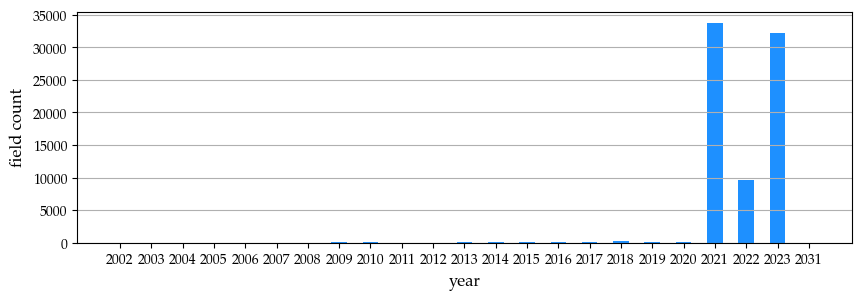

In [60]:
df = data_2022_nofilter.copy()

fig, axs = plt.subplots(1, 1, figsize=(10, 3), sharex=False, gridspec_kw={"hspace": 0.35, "wspace": 0.05})
axs.grid(axis="y", which="both")

LL = len(df["last_survey_year"].unique())
X_axis = np.arange(LL)

bar_width_ = 1
step_size_ = 2*bar_width_
X_axis = np.array(range(0, step_size_ * LL, step_size_))

df = df[["id", "last_survey_year"]].groupby("last_survey_year").count().reset_index()
axs.bar(2 + X_axis - bar_width_ * 2, df["id"], color="dodgerblue", width=bar_width_);
axs.set_ylabel("field count");
axs.set_xlabel("year");
axs.set_xticks(X_axis, df["last_survey_year"]);

In [59]:
2+ X_axis - bar_width_ * 2

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32,
       34, 36, 38, 40, 42, 44])

In [52]:
X_axis - bar_width_ * 5

array([-5, -4, -3, -2, -1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,
       12, 13, 14, 15, 16, 17])